# Which GPU to use

In [1]:
multiGPU = False
whichGPU = 0
 
# Select which GPU to use
if(multiGPU):
    from keras.utils.training_utils import multi_gpu_model
else:
    import os
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    # The GPU id to use, usually either "0" or "1"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# # Do other imports now...

# Load all the functions

In [2]:
%run -i 'arena.py'

Using TensorFlow backend.


In [3]:
# %load_ext autoreload
# %autoreload 1
# %aimport arena
# %reload_ext autoreload

# TRAINING TEMPLATE CODE


In [4]:
%reload_ext autoreload
##### TRAINING TEMPLATE CODE

##############################
#
#    PARAMETERS 
#
##############################
import math

# Experiment description
expDescr = "Experiment description text"

# What data to use
tableBase = '4PpKk'
convertStates = False
fractionOfDataToUse = 1 # [0,1]

# Interactive (just in general if one is asked for confirmations, set to False if on autopilot over night f.x.)
askForConfirmation = True

# Transfer Learning
loadWeights = False 
weightsSource = '024'
loadCheckpointWeights = False

# Plot during training
plotDuringTraining = True
compareResultsDuringTraining = False
compareWith = '013' # orginal net structure, trained from random on 4pc dataset


# NN parameters
# filters = [8,16,16,32,32]    #016:0.913  10kpm 2048:30                  8192:23:38% 32768:17:52% 
# filters = [8,16,32,64,128]   #005:0.952  50kpm 2048:37s    4096:28:50% 
# filters = [8,32,64,128,256]  #013:0.968 188kpm 2048:50s    4096:40s:61%             32768:46s:80% 65536:42s:99% 
# filters = [32,64,128,160,256]#014:0.974 388kpm 2048:3m:91% 
# filters = [16,32,64,128,128,128]#035:0.975 191kpm 2048:45s:50%/50% 2048:68s:78% 
# filters = [16,16,32,32,64,64,128] #054 70kpm
# filters = [16,16,32,32,64,64,128] #054 70kpm
filters = [16,32,32,64,128,128,128]
filterShape = [2,2,2,2,2,2,2]
batch_size = 256
epochs = 150
multiGPU = False
whichGPU = 0
# optimizer = 'Adam'
optimizer = 'Adadelta'
useBatchNorm = False

# Other paramters
confirmDirOverwrite = False
tPrintInterval = 0.5 # for print progress
yieldSize = 10000 # for load generator

### NO NEED TO MODIFY BELOW ###
# Generate dataset variables
fileName = tableBase + '.hdf5'
dataSetName = tableBase + '_onlyLegal'
if not convertStates: 
    dataSetName = tableBase + '_onlyLegal_fullStates'
dataSetWdlName = tableBase + '_Wdl_onlyLegal_3Values'

# Number of Pieces
nPi =  int(dataSetName[0])
nPa = nPi - 2
nWPa = math.ceil(nPa/2)

# Select which GPU to use
# if(multiGPU):
#     from keras.utils.training_utils import multi_gpu_model
# else:
#     import os
#     os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#     # The GPU id to use, usually either "0" or "1"
#     os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# Other NN stuff
num_classes = 3
input_shape = (4,8,8)


In [5]:
# Train, evaluate and save 
# %reload_ext autoreload
model, nnStr = createModel()
# resID = genNextResultsDir(model)
# X_train, X_test, y_train, y_test = loadData()
# score = calcScoreBigData(model)
# score = calcScore(model)
# saveTrainResults(resID, model, logDir, score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 3, 128)        32896     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 2, 128)        65664     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 1, 128)        65664     
__________

### many batches

In [ ]:
# Train and save with different paramters
X_train, X_test, y_train, y_test = loadData()

bs = [256,256,256,512,512,512,1024,1024,1024]

for batch_size in bs:
    expDescr = "Testing batch size effect for 70kpm network (7 CNN layers) {}bs".format(batch_size) 
    print("---------------------- batch size ", batch_size, '-------------------------------')
    model, nnStr = createModel()
    resID = genNextResultsDir(model)
    fitHistory, logDir = trainModel(resID, model)
    score = calcScore(model)
    saveTrainResults(resID, model, logDir)

# Experiments

In [7]:
%reload_ext autoreload
##### TRAINING TEMPLATE CODE

##############################
#
#    PARAMETERS 
#
##############################
import math

# Experiment description
expDescr = "Bengio - with freeze"

# What data to use
tableBase = '4PpKk'
convertStates = False
fractionOfDataToUse = 1 # [0,1]

# Interactive (just in general if one is asked for confirmations, set to False if on autopilot over night f.x.)
askForConfirmation = True

# Transfer Learning
loadWeights = True 
weightsSource = '103'
loadCheckpointWeights = False

# Plot during training
plotDuringTraining = True
compareResultsDuringTraining = False
compareWith = '013' # orginal net structure, trained from random on 4pc dataset

# NN parameters
# filters = [8,16,16,32,32]    #016:0.913  10kpm 2048:30                  8192:23:38% 32768:17:52% 
# filters = [8,16,32,64,128]   #005:0.952  50kpm 2048:37s    4096:28:50% 
# filters = [8,32,64,128,256]  #013:0.968 188kpm 2048:50s    4096:40s:61%             32768:46s:80% 65536:42s:99% 
# filters = [32,64,128,160,256]#014:0.974 388kpm 2048:3m:91% 
# filters = [16,32,64,128,128,128]#035:0.975 191kpm 2048:45s:50%/50% 2048:68s:78% 
# filters = [16,16,32,32,64,64,128] #054 70kpm
# filters = [16,16,32,32,64,64,128] #054 70kpm
filters = [16,32,32,64,128,128,128]
filterShape = [2,2,2,2,2,2,2]
batch_size = 256
epochs = 150
multiGPU = False
whichGPU = 0
# optimizer = 'Adam'
optimizer = 'Adadelta'
useBatchNorm = False

# Other paramters
confirmDirOverwrite = False
tPrintInterval = 0.5 # for print progress
yieldSize = 10000 # for load generator

### NO NEED TO MODIFY BELOW ###
# Generate dataset variables
fileName = tableBase + '.hdf5'
dataSetName = tableBase + '_onlyLegal'
if not convertStates: 
    dataSetName = tableBase + '_onlyLegal_fullStates'
dataSetWdlName = tableBase + '_Wdl_onlyLegal_3Values'

# Number of Pieces
nPi =  int(dataSetName[0])
nPa = nPi - 2
nWPa = math.ceil(nPa/2)

# Select which GPU to use
# if(multiGPU):
#     from keras.utils.training_utils import multi_gpu_model
# else:
#     import os
#     os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#     # The GPU id to use, usually either "0" or "1"
#     os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# Other NN stuff
num_classes = 3
input_shape = (4,8,8)


In [ ]:
# transfer n layers
# A = 3pc
# B = 4pc
# n-Transfer BnB and BnB+
# n-Transfer AnB and AnB+
# 
# Create funtion nTransferTrain(sourceNet, n, freeze?, epochs, nAverage ) > finalScore
# and loop through all experiment points
#
# for n in N:
#     load weights
#     randomise all bur first n layers
#     train 4pc up to 20 epochs
#     save train info
#     incrementally save final accuracy
#     save 

In [4]:
%run -i 'arena.py'

def loadNFirstLayers(model, sourceNet, copyFirstNLayers, freeze):
    # Load weights
    weightsPath = 'Results/' + sourceNet + '/weights.hdf5'
    print("Loading weights from {}".format(weightsPath))
#     model.load_weights(weightsPath)
    model.load_weights(weightsPath)
    
    # Randomize all but first n layers
    session = K.get_session()
    layers = model.layers
    for i in range(copyFirstNLayers, len(layers)):
        layer = layers[i]
        if hasattr(layer, 'kernel_initializer'):
            print('- Resetting layer nr {}: {}'.format(i+1,layer))
            layer.kernel.initializer.run(session=session)
            if freeze:
                layer.trainable=False
            else:
                layer.trainable=True
        else: 
            print('- Skipping layer nr {}: {}'.format(i+1,layer))
    
            
    return model

X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 3, 128)        32896     
_________________________________________________________________
conv2d_13 (Conv2D)    

/home/frimann/anaconda3/envs/endnetGpu/lib/python3.5/site-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 171s 34us/step - loss: 0.2537 - acc: 0.8900 - val_loss: 0.1706 - val_acc: 0.9280

Epoch 00001: val_acc improved from -inf to 0.92800, saving model to Results/160/weightsCheckpoints/weights-checkp-001-0.928.hdf5
Train Accuracy of last epoch:  0.8900296215835061
Validation Accuracy of last epoch:  0.9279993968826936
Train Loss of last epoch:  0.25373556285866977
Validation Loss of last epoch:  0.17055997422842914
Epoch 2/20
4982178/4982178 [==============================] - 172s 34us/step - loss: 0.1464 - acc: 0.9389 - val_loss: 0.1297 - val_acc: 0.9471

Epoch 00002: val_acc improved from 0.92800 to 0.94713, saving model to Results/160/weightsCheckpoints/weights-checkp-002-0.947.hdf5
Train Accuracy of last epoch:  0.9388970044837355
Validation Accuracy of last epoch:  0.9471288678063534
Train Loss of last epoch:  0.14636670377183322
Validation Loss of last epoch:  0.1297475

4982178/4982178 [==============================] - 172s 35us/step - loss: 0.0539 - acc: 0.9796 - val_loss: 0.0603 - val_acc: 0.9776

Epoch 00019: val_acc improved from 0.97667 to 0.97755, saving model to Results/160/weightsCheckpoints/weights-checkp-019-0.978.hdf5
Train Accuracy of last epoch:  0.979565162063899
Validation Accuracy of last epoch:  0.9775509289268396
Train Loss of last epoch:  0.05389878370161116
Validation Loss of last epoch:  0.0602645579827475
Epoch 20/20
4982178/4982178 [==============================] - 172s 34us/step - loss: 0.0530 - acc: 0.9800 - val_loss: 0.0656 - val_acc: 0.9756

Epoch 00020: val_acc did not improve from 0.97755
Train Accuracy of last epoch:  0.9800017181243208
Validation Accuracy of last epoch:  0.9755594133427175
Train Loss of last epoch:  0.05301108652614784
Validation Loss of last epoch:  0.06563818513593246
Training done
Calculating score
2453910/2453910 [==============================] - 118s 48us/step
(4982178, 4, 8, 8)
Evaluated test lo

<Figure size 432x288 with 0 Axes>

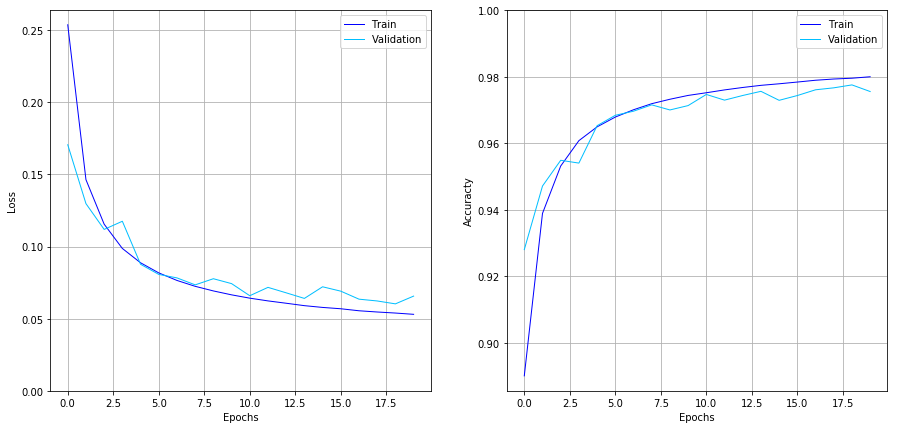

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7faa0162f320>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fa675962eb8>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fa6764de278>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fa6759ce5c0>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fa6759e7278>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/161/
Creating save dir
Done generating results dir Results/161/
Saving weights to Results/161/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [===========

4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0618 - acc: 0.9761 - val_loss: 0.0677 - val_acc: 0.9746

Epoch 00017: val_acc improved from 0.97336 to 0.97457, saving model to Results/161/weightsCheckpoints/weights-checkp-017-0.975.hdf5
Train Accuracy of last epoch:  0.9761375446646796
Validation Accuracy of last epoch:  0.9745691569796018
Train Loss of last epoch:  0.06181367262571217
Validation Loss of last epoch:  0.06773634946304237
Epoch 18/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0607 - acc: 0.9767 - val_loss: 0.0684 - val_acc: 0.9743

Epoch 00018: val_acc did not improve from 0.97457
Train Accuracy of last epoch:  0.9767017557387513
Validation Accuracy of last epoch:  0.9742578171179117
Train Loss of last epoch:  0.0607165329042083
Validation Loss of last epoch:  0.06840775530783667
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0595 - acc: 0.9771 - val_loss: 0.0682 - val_a

<Figure size 432x288 with 0 Axes>

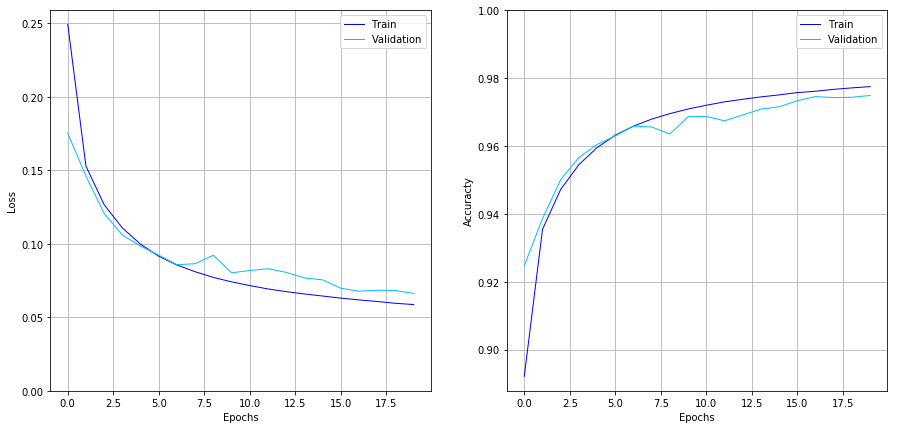

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fa675962eb8>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fa6764de278>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fa6759ce5c0>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fa6759e7278>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/163/
Creating save dir
Done generating results dir Results/163/
Saving weights to Results/163/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 172s 35us/step - loss: 0.2417 - acc: 0.8958 - val_loss: 0.1741

4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0630 - acc: 0.9757 - val_loss: 0.0763 - val_acc: 0.9712

Epoch 00017: val_acc did not improve from 0.97173
Train Accuracy of last epoch:  0.9757401281132428
Validation Accuracy of last epoch:  0.9711982102019966
Train Loss of last epoch:  0.06297821957512269
Validation Loss of last epoch:  0.07628588283617145
Epoch 18/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0622 - acc: 0.9760 - val_loss: 0.0719 - val_acc: 0.9724

Epoch 00018: val_acc improved from 0.97173 to 0.97236, saving model to Results/163/weightsCheckpoints/weights-checkp-018-0.972.hdf5
Train Accuracy of last epoch:  0.9760281547554062
Validation Accuracy of last epoch:  0.9723641046320912
Train Loss of last epoch:  0.06224120094265085
Validation Loss of last epoch:  0.07187723051073398
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0612 - acc: 0.9765 - val_loss: 0.0693 - val_

<Figure size 432x288 with 0 Axes>

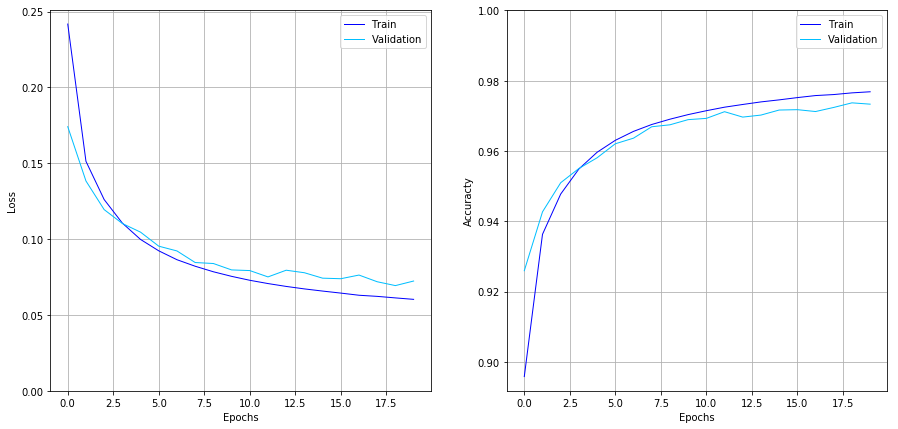

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fa6764de278>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fa6759ce5c0>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fa6759e7278>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/165/
Creating save dir
Done generating results dir Results/165/
Saving weights to Results/165/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.2271 - acc: 0.9032 - val_loss: 0.1567 - val_acc: 0.9349

Epoch 00001: val_acc improved from -inf to 0.93494, saving model 


Epoch 00017: val_acc improved from 0.97358 to 0.97520, saving model to Results/165/weightsCheckpoints/weights-checkp-017-0.975.hdf5
Train Accuracy of last epoch:  0.977687268500439
Validation Accuracy of last epoch:  0.9751955043187651
Train Loss of last epoch:  0.05830305899958817
Validation Loss of last epoch:  0.06673992507813982
Epoch 18/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0573 - acc: 0.9781 - val_loss: 0.0646 - val_acc: 0.9754

Epoch 00018: val_acc improved from 0.97520 to 0.97542, saving model to Results/165/weightsCheckpoints/weights-checkp-018-0.975.hdf5
Train Accuracy of last epoch:  0.9781045558792143
Validation Accuracy of last epoch:  0.9754237115443629
Train Loss of last epoch:  0.05730780730414551
Validation Loss of last epoch:  0.06462478107475671
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0566 - acc: 0.9784 - val_loss: 0.0700 - val_acc: 0.9737

Epoch 00019: val_acc did not improve f

<Figure size 432x288 with 0 Axes>

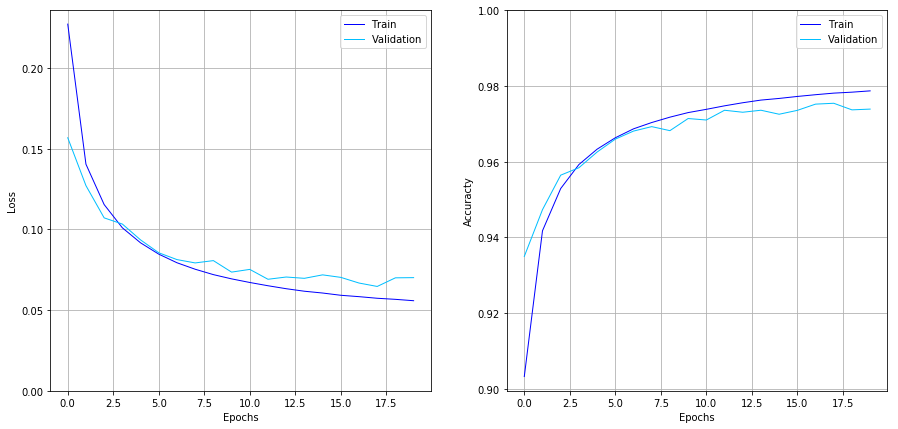

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fa6759ce5c0>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fa6759e7278>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/167/
Creating save dir
Done generating results dir Results/167/
Saving weights to Results/167/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.2166 - acc: 0.9079 - val_loss: 0.1551 - val_acc: 0.9352

Epoch 00001: val_acc improved from -inf to 0.93519, saving model to Results/167/weightsCheckpoints/weights-checkp-001-0.935.hdf5
Train Accuracy of las

4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0563 - acc: 0.9786 - val_loss: 0.0678 - val_acc: 0.9747

Epoch 00017: val_acc did not improve from 0.97626
Train Accuracy of last epoch:  0.9785696135305877
Validation Accuracy of last epoch:  0.9746706276915977
Train Loss of last epoch:  0.056275987485645364
Validation Loss of last epoch:  0.06781845917159712
Epoch 18/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0551 - acc: 0.9790 - val_loss: 0.0650 - val_acc: 0.9758

Epoch 00018: val_acc did not improve from 0.97626
Train Accuracy of last epoch:  0.9789622129119417
Validation Accuracy of last epoch:  0.9758401897391759
Train Loss of last epoch:  0.05512250108884515
Validation Loss of last epoch:  0.06501203171146494
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0541 - acc: 0.9793 - val_loss: 0.0635 - val_acc: 0.9765

Epoch 00019: val_acc improved from 0.97626 to 0.97650, saving model 

<Figure size 432x288 with 0 Axes>

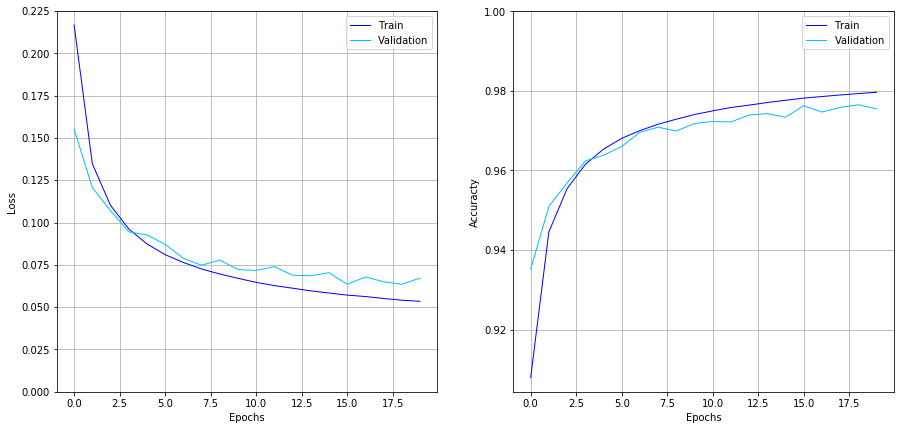

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fa6759e7278>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/169/
Creating save dir
Done generating results dir Results/169/
Saving weights to Results/169/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.2185 - acc: 0.9082 - val_loss: 0.1610 - val_acc: 0.9337

Epoch 00001: val_acc improved from -inf to 0.93368, saving model to Results/169/weightsCheckpoints/weights-checkp-001-0.934.hdf5
Train Accuracy of last epoch:  0.908182525794441
Validation Accuracy of last epoch:  0.9336768667146075
Tr

4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0642 - acc: 0.9754 - val_loss: 0.0756 - val_acc: 0.9717

Epoch 00018: val_acc did not improve from 0.97241
Train Accuracy of last epoch:  0.9753973061581894
Validation Accuracy of last epoch:  0.9716839655879098
Train Loss of last epoch:  0.06420257554237048
Validation Loss of last epoch:  0.07562084950491779
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0635 - acc: 0.9758 - val_loss: 0.0758 - val_acc: 0.9719

Epoch 00019: val_acc did not improve from 0.97241
Train Accuracy of last epoch:  0.9758101777981012
Validation Accuracy of last epoch:  0.9718612337061321
Train Loss of last epoch:  0.06345423712427672
Validation Loss of last epoch:  0.07581061224667975
Epoch 20/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0627 - acc: 0.9761 - val_loss: 0.0747 - val_acc: 0.9721

Epoch 00020: val_acc did not improve from 0.97241
Train Accuracy of l

<Figure size 432x288 with 0 Axes>

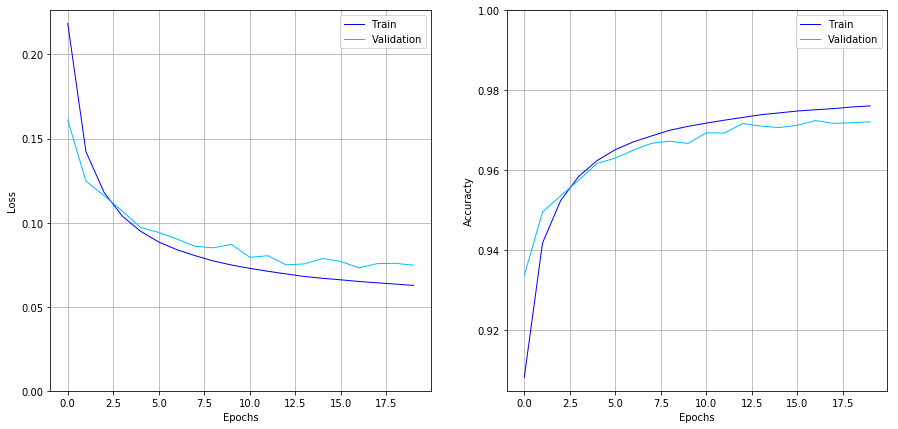

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fa6759425f8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/171/
Creating save dir
Done generating results dir Results/171/
Saving weights to Results/171/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 171s 34us/step - loss: 0.2170 - acc: 0.9086 - val_loss: 0.1660 - val_acc: 0.9314

Epoch 00001: val_acc improved from -inf to 0.93143, saving model to Results/171/weightsCheckpoints/weights-checkp-001-0.931.hdf5
Train Accuracy of last epoch:  0.9085783366226764
Validation Accuracy of last epoch:  0.9314339156710763
Train Loss of last epoch:  0.21701509428832508
Validation Loss of last epoch:  0.16596

4982178/4982178 [==============================] - 172s 34us/step - loss: 0.0624 - acc: 0.9760 - val_loss: 0.0792 - val_acc: 0.9704

Epoch 00018: val_acc did not improve from 0.97228
Train Accuracy of last epoch:  0.9760494305909946
Validation Accuracy of last epoch:  0.9703717740250193
Train Loss of last epoch:  0.062389883268467394
Validation Loss of last epoch:  0.07924827392889555
Epoch 19/20
4982178/4982178 [==============================] - 172s 35us/step - loss: 0.0617 - acc: 0.9763 - val_loss: 0.0729 - val_acc: 0.9724

Epoch 00019: val_acc improved from 0.97228 to 0.97244, saving model to Results/171/weightsCheckpoints/weights-checkp-019-0.972.hdf5
Train Accuracy of last epoch:  0.9763364536560075
Validation Accuracy of last epoch:  0.9724390870096355
Train Loss of last epoch:  0.061741721136735477
Validation Loss of last epoch:  0.07294086960058162
Epoch 20/20
4982178/4982178 [==============================] - 172s 34us/step - loss: 0.0612 - acc: 0.9765 - val_loss: 0.0705 - va

<Figure size 432x288 with 0 Axes>

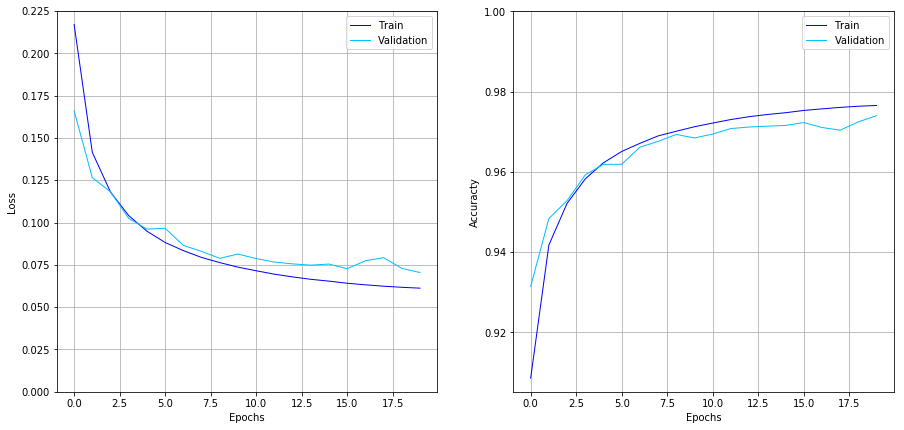

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fa67595b0b8>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fa67595bf98>
Save dir: Results/173/
Creating save dir
Done generating results dir Results/173/
Saving weights to Results/173/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.2236 - acc: 0.9063 - val_loss: 0.1656 - val_acc: 0.9313

Epoch 00001: val_acc improved from -inf to 0.93130, saving model to Results/173/weightsCheckpoints/weights-checkp-001-0.931.hdf5
Train Accuracy of last epoch:  0.9062548548039626
Validation Accuracy of last epoch:  0.9312957687944967
Train Loss of last epoch:  0.22361573795821668
Validation Loss of last epoch:  0.1656070516989685
Epoch 2/20
4982178/4982178 [==============================] - 173s 35us/s

4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0694 - acc: 0.9735 - val_loss: 0.0798 - val_acc: 0.9702

Epoch 00018: val_acc did not improve from 0.97052
Train Accuracy of last epoch:  0.9734529757873733
Validation Accuracy of last epoch:  0.9702173266345984
Train Loss of last epoch:  0.06942368595588207
Validation Loss of last epoch:  0.07980984173327907
Epoch 19/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0687 - acc: 0.9738 - val_loss: 0.0817 - val_acc: 0.9698

Epoch 00019: val_acc did not improve from 0.97052
Train Accuracy of last epoch:  0.9737546510786624
Validation Accuracy of last epoch:  0.9698415997313599
Train Loss of last epoch:  0.06873854147294021
Validation Loss of last epoch:  0.08168616910369987
Epoch 20/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.0682 - acc: 0.9740 - val_loss: 0.0775 - val_acc: 0.9713

Epoch 00020: val_acc improved from 0.97052 to 0.97129, saving model t

<Figure size 432x288 with 0 Axes>

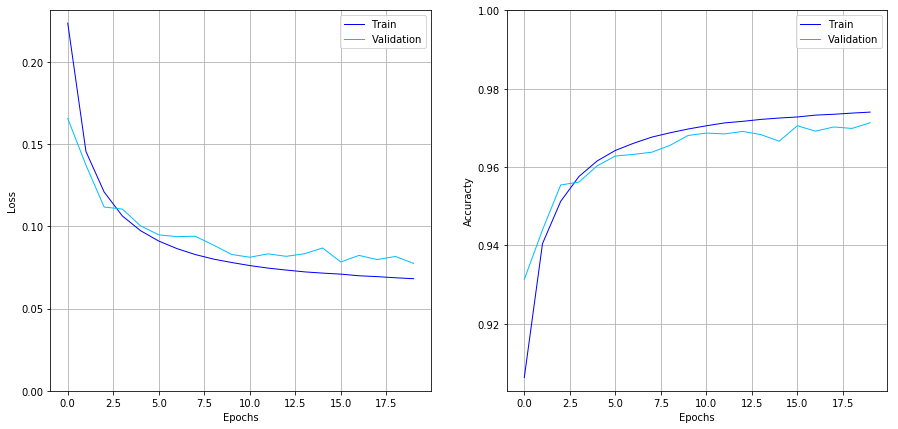

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading weights from Results/103/weights.hdf5
Save dir: Results/175/
Creating save dir
Done generating results dir Results/175/
Saving weights to Results/175/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/20
4982178/4982178 [==============================] - 171s 34us/step - loss: 0.2370 - acc: 0.9009 - val_loss: 0.1659 - val_acc: 0.9312

Epoch 00001: val_acc improved from -inf to 0.93125, saving model to Results/175/weightsCheckpoints/weights-checkp-001-0.931.hdf5
Train Accuracy of last epoch:  0.9008602261909503
Validation Accuracy of last epoch:  0.9312460522185583
Train Loss of last epoch:  0.23697860897537962
Validation Loss of last epoch:  0.16591548307014728
Epoch 2/20
4982178/4982178 [==============================] - 173s 35us/step - loss: 0.1501 - acc: 0.9378 - val_loss: 0.1399 - val_acc: 0.9421

Epoch 00002: val_acc improved from 0.93125 to 0.94213, saving model to Results/

2558464/4982178 [==============>...............] - ETA: 1:15 - loss: 0.0713 - acc: 0.9726

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
# 3n4 freeze
%run -i 'arena.py'
fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
sourceNet = '103'
freeze = True
epochs = 20
askForConfirmation = False
resSaveFile = '3n4'
averageOver = 5

X_train, X_test, y_train, y_test = loadData()
model, nnStr = createModel()
results = []

for copyFirstNLayers in range(10):
    if copyFirstNLayers != 8:
        model = loadNFirstLayers(model,sourceNet, copyFirstNLayers , freeze)

        resID = genNextResultsDir(model)
        #add freeze and some tl parameters to save dir

        # train
        fitHistory, logDir = trainModel(resID, model)

        # score and save accuracy
        score = calcScore(model)
        saveTrainResults(resID, model, logDir, score, copyFirstNLayers)
        results.append(score[1])

        # save results incrementally to txt file
        save_obj('temp', resSaveFile, results)
#         results = load_obj('temp','3n4.txt')
print(results)

In [14]:

# save results incrementally to txt file
resSaveFile = '3n4'
save_obj('temp', resSaveFile, results)
# results = load_obj('temp','3n4.txt')
with open('temp/' + str(resSaveFile) + '.txt','w') as file:
    file.write(str(results))

In [36]:
acc3n4
acc3n42 = load_obj('temp','3n4.txt')

[0.6853987529859882,
 0.649333713685122,
 0.6810790985510554,
 0.7247239088603107,
 0.7299808467885549,
 0.7974245079407322,
 0.7934716165835751,
 0.7285952972964517,
 0.6912262113346264]